In [1]:
import main
import numpy as np
import numpy.random as rdn

In [2]:
lasfile = "../test_data/cs_test2.las"
x, z = main.condition_las_profile(lasfile)

In [4]:
scarp1 = main.Scarp(x, z)

In [5]:
scarp1.gen_ss()
scarp1.gen_1e()

In [ ]:
# scarp1.num_sim = 10000
scarp1.sim_1e()
scarp1.sim_ss()

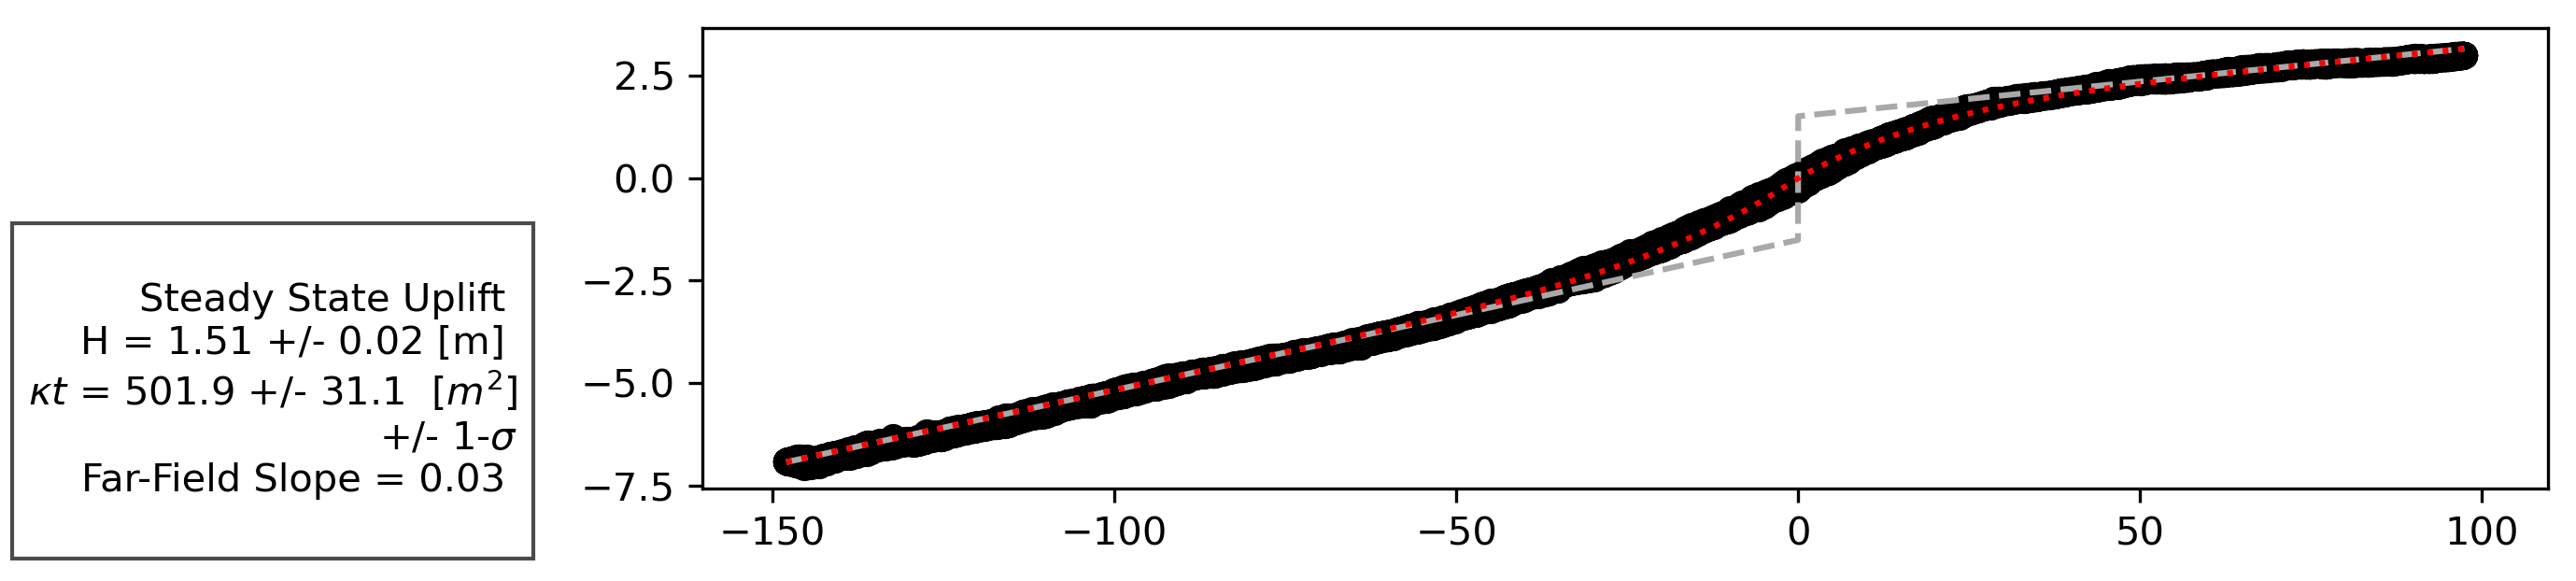

In [7]:
scarp1.aspect = 6
scarp1.plot_scarp('ss', unc=True)

In [ ]:
scarp1.save_scarp_fig("one_event.png")

In [8]:
I = np.argsort(x)
x = x[I]
z = z[I]
x1 = np.arange(x.min(), x.max(), 0.01) - scarp1.midx
z1 = np.interp(x1, x - scarp1.midx, z)


In [9]:
h = rdn.randn(1, 10000) * scarp1.Hinit.s +scarp1.Hinit.n
d = rdn.randn(1, 10000) * scarp1.D1_sim.s + scarp1.D1_sim.n
b_sim_orig = scarp1.b_sim
b_sim = np.empty(shape=(x1.shape[0], 10000), dtype=float)
for i, column in enumerate(b_sim_orig.T):
    b_new = np.interp(x1, x - scarp1.midx, column.T)
    b_sim[:, i] = b_new


In [15]:
xb_sim = (b_sim.T * x1).T
x2  = ((xb_sim.transpose() + (-1 * x1))*-1).transpose()

In [16]:
erff = main.vec_erf(x1)

In [12]:
size = erff.nbytes
size_mb = size / 1e6

In [11]:
u1 = main.scarp_1e(x1, h.T, d.T)